In [1]:
import torch
from torch import nn

class foo(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.f = nn.Linear(2, 3)
    def forward(self, x):
        return self.f(x)



In [2]:
from copy import deepcopy

In [3]:
a0 = foo()
a1 = a0
a2 = deepcopy(a0)

x = torch.Tensor([1,2])
y = torch.Tensor([1,2,3])
p = a1(x)
l = nn.functional.mse_loss(y, p)
o = torch.optim.Adam(params=a1.parameters(), lr=10.0)
a1.zero_grad()
l.backward()
o.step()


print(a1.parameters())
print(a2.parameters())

<generator object Module.parameters at 0x12ea427a0>
<generator object Module.parameters at 0x12ea427a0>


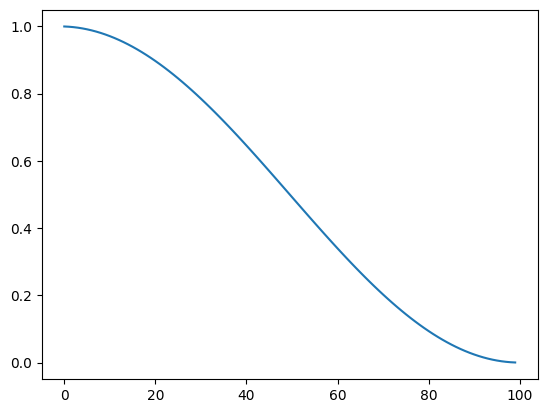

In [8]:
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
optimizer = torch.optim.Adam(params=a1.parameters(), lr=1.0)
T_0 = 101
T_mult = 1
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0, T_mult)
last_lrs = []
for i in range(100):
    scheduler.step()
    last_lrs.append(scheduler.get_last_lr()[0])
from matplotlib import pyplot as plt
plt.plot(last_lrs)

In [1]:
from record import TrainRecord
from dqn_v1 import DQNTrainConfig
record = TrainRecord.load("../20231015-132531.json")
record.plot()

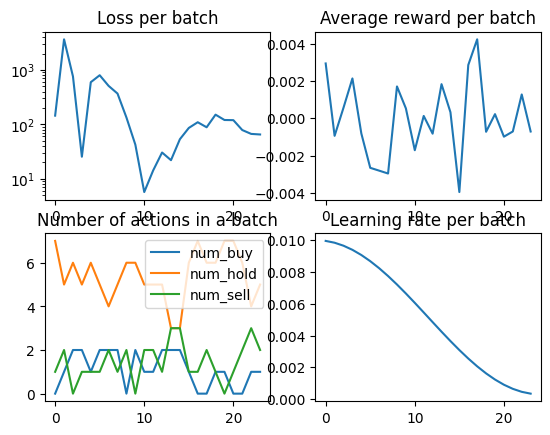

In [2]:
record.plot()

In [1]:
import pandas as pd

df = pd.DataFrame([{"a": 1, "b": 2}, {"a": 3, "b": 4}])
dfi = df.set_index("a")
dfi = dfi[:1]

print("df")
print(df)
print("dfi")
print(dfi)

df
   a  b
0  1  2
1  3  4
dfi
   b
a   
1  2
